In [3]:
from mazeAgentUtils import * 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [190]:
x = np.linspace(0,3,30)
y = np.array([0.075]*30)
centres = np.vstack((x,y)).T

# centres = np.array([[1,0],[1.5,0.075],[2,0.18]])
# centres = np.array([[1,0.075],[1.1,0.075],[1.2,0.075],[1.3,0.075],[1.4,0.075],[1.5,0.075],[1.6,0.075],[1.7,0.075]])
xcen = np.arange(0,3,0.1)
ycen = 0.075*np.ones(30)
centres = np.vstack((xcen,ycen)).T
params = { 
          'mazeType'           : 'oneRoom',
          'stateType'          : 'gaussianThreshold',
          'movementPolicy'     : 'randomWalk',
          'roomSize'           : 1,
          'dt'                 : 0.005,
          'dx'                 : 0.01,     
          'tau'                : 2,
          'TDdx'               : 0.02,
          'alpha'              : 0.001,
          'nCells'             : None,
          # 'centres'            : centres,
          # 'centres'            : None,
          'speedScale'         : 0.16,
          # 'rotSpeedScale'      : 0.1*np.pi,
          'rotSpeedScale'      : None,
          'initPos'            : None,  
          'initDir'            : None,
          'sigma'              : 0.3,
          'placeCellThreshold' : 0.5, 
          'gridCellThreshold'  : 0,
          'doorsClosed'        : True}

agent =  MazeAgent(params)

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


In [191]:
agent.pos = np.array([0.1,0.08])
agent.dir = np.array([1,0])
agent.runRat(60)

  0%|          | 0/719999 [00:00<?, ?it/s]

/Users/tomgeorge/Documents/UCL/Rotation2_Barry/CompositionalMazes/mazeAgentUtils.py:452: RuntimeWarning: divide by zero encountered in double_scalars
/Users/tomgeorge/Documents/UCL/Rotation2_Barry/CompositionalMazes/mazeAgentUtils.py:453: RuntimeWarning: divide by zero encountered in double_scalars
Calculating place and grid cells


(<Figure size 600x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb21174a3c8>)

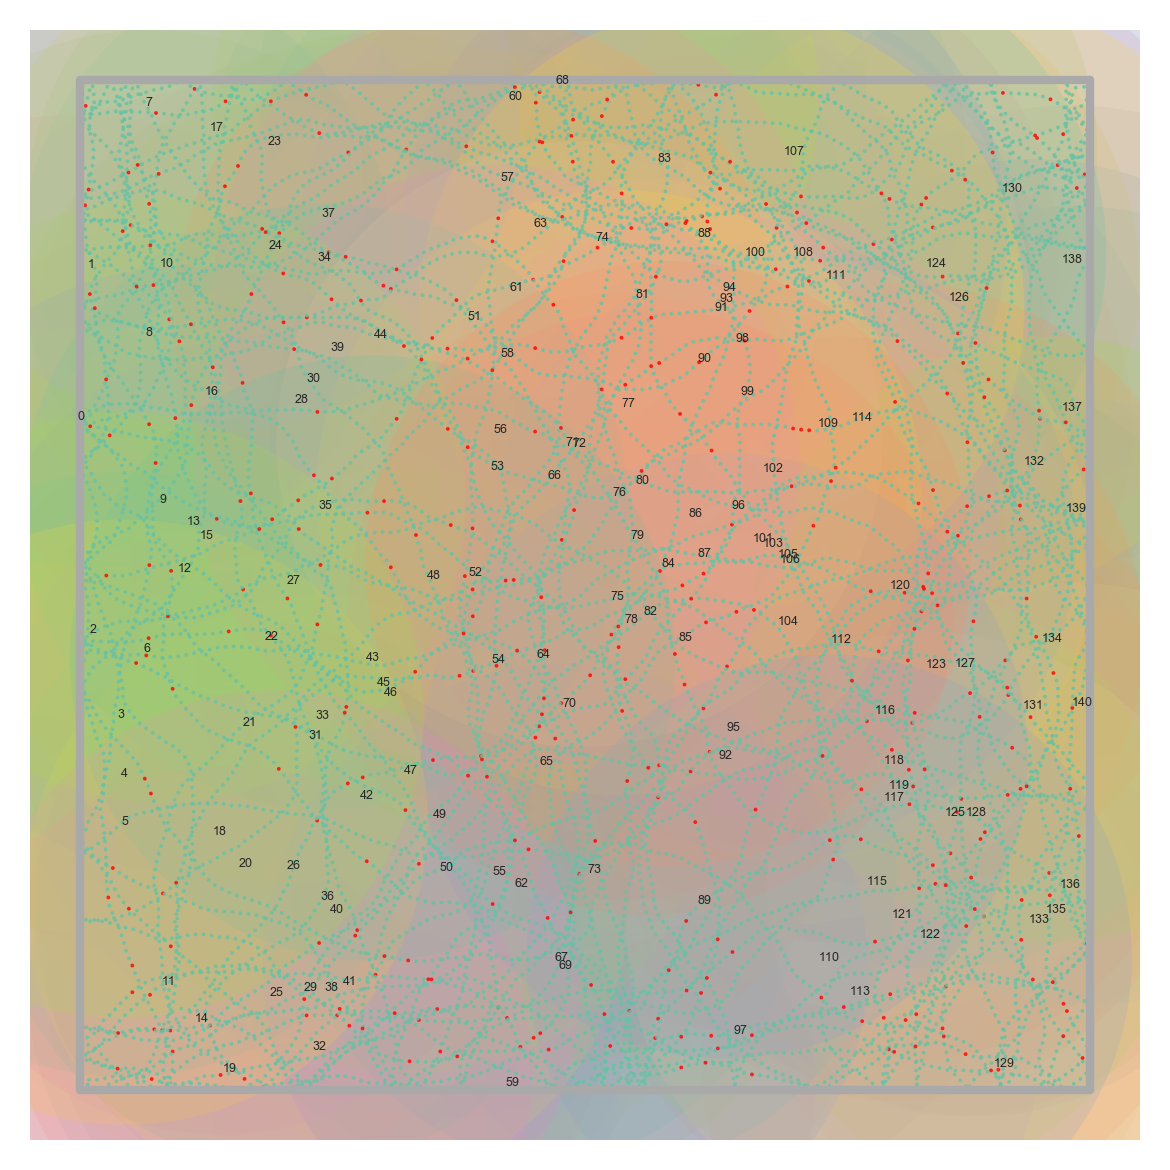

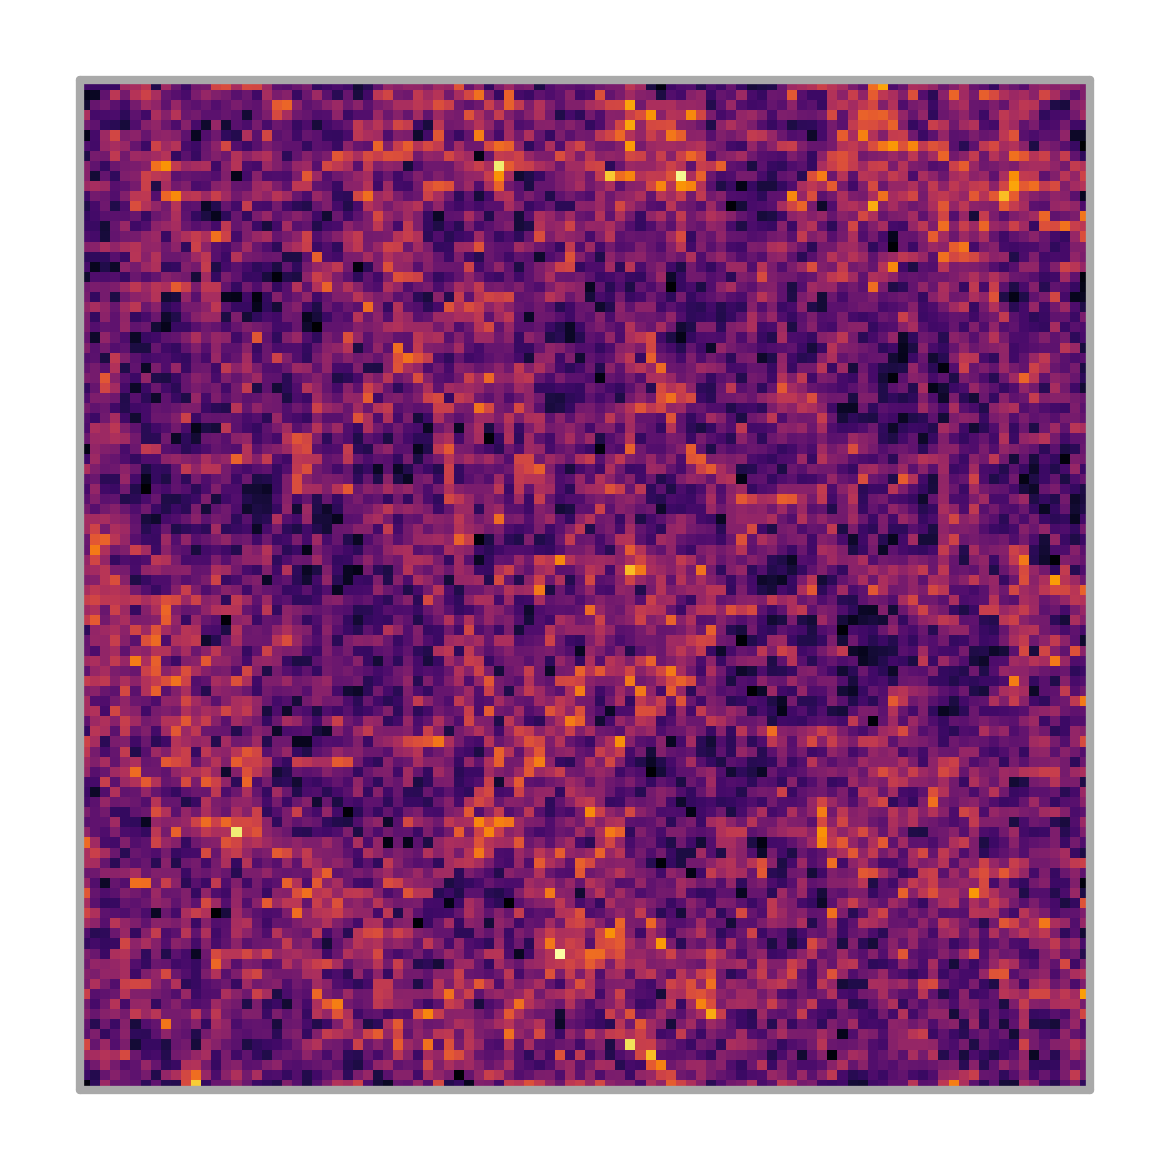

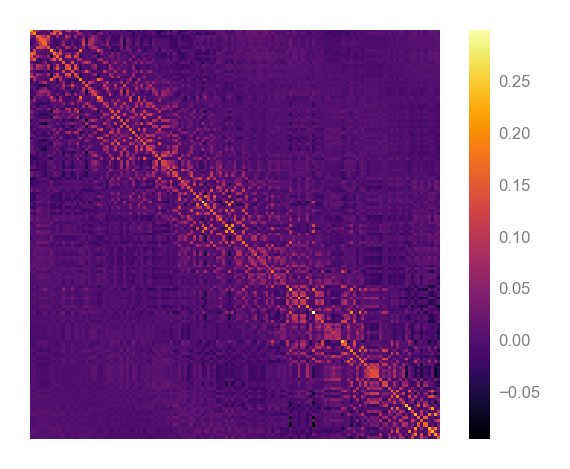

In [192]:
plotter = Visualiser(agent)
fig, ax = plotter.plotFeatureCells(shufflebeforeplot=True)
plottimestart, plottimeend = 0, 10
plotter.plotTrajectory(fig=fig, ax=ax, endtime=10, skiprate=10)
plotter.plotHeatMap()

plotter.plotM()


(119999, 30)


'./figures/210526/theta_1138'

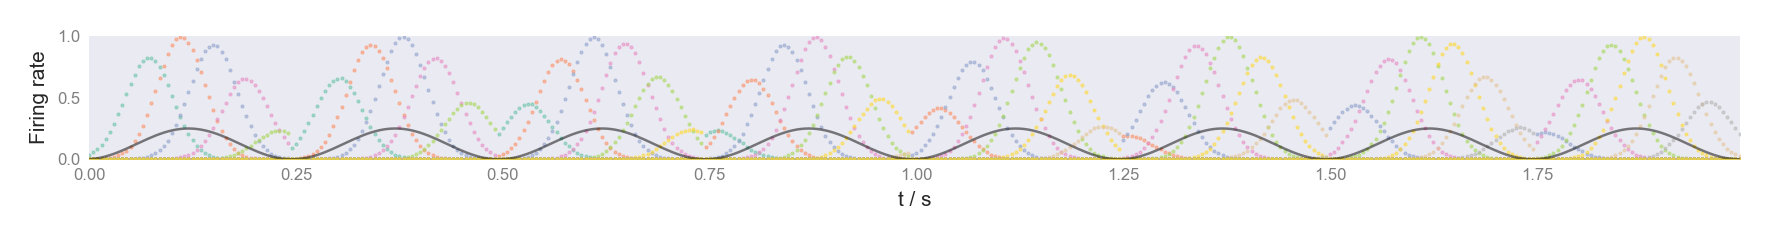

In [147]:
x = np.vstack(agent.history['pos'].to_numpy())[:,0]
t = agent.history['t'].to_numpy()
FRs = np.vstack(agent.history['FiringRate'].to_numpy())
print(FRs.shape)
thetaPhase = np.vstack(agent.history['thetaPhase'].to_numpy())

sid, eid = np.argmin(np.abs(t - 0)), np.argmin(np.abs(t - 2))

extent=agent.extent
fig, ax = plt.subplots(1,1,figsize=(2*(extent[1]-extent[0]),6*(extent[3]-extent[2])))

for i in range(FRs.shape[1]):
    ax.scatter(t[sid:eid], FRs[sid:eid,i],s=0.5,alpha=0.5,c='C'+str(i))
ax.plot(t[sid:eid],(0.25*np.sin(thetaPhase/2)**2)[sid:eid],alpha=0.5,color='k',linewidth=0.6)
ax.grid(False)
# ax.set_xlim(extent[0],extent[1])
ax.set_ylim(0,1)
ax.set_xlabel('t / s')
ax.set_ylabel("Firing rate")

saveFigure(fig,"theta",transparent=False)


In [193]:
FRs = np.vstack(agent.history['FiringRate'].to_numpy())
t = agent.history['t'].to_numpy()
spikeTimes = [[] for i in range(FRs.shape[1])]
for cell in tqdm(range(FRs.shape[1])):
    for timebin in range(FRs.shape[0]-1):
        fr = 20*FRs[timebin,cell] + 0.5
        ts, te = t[timebin], t[timebin+1]
        dt = te - ts
        number_of_spikes = np.random.poisson(fr*dt)
        if number_of_spikes != 0:
            time_of_spikes = np.random.uniform(ts,te,number_of_spikes)
            for spiketime in time_of_spikes:
                spikeTimes[cell].append(spiketime) 
spikecounts = [len(cell) for cell in spikeTimes]
print(spikecounts)
print(f"{sum(spikecounts)} spikes in total")

  0%|          | 0/141 [00:00<?, ?it/s]

[3304, 3213, 3372, 3477, 3422, 3525, 3679, 2994, 3851, 3927, 3806, 3415, 4042, 4115, 3354, 4133, 4294, 3305, 4049, 3249, 4086, 4206, 4363, 3749, 4222, 3844, 4343, 4421, 4598, 3997, 4599, 4381, 3556, 4394, 4497, 4629, 4318, 4311, 3995, 4572, 4358, 4059, 4458, 4507, 4837, 4412, 4443, 4462, 4595, 4614, 4509, 4807, 4440, 4759, 4599, 4642, 4682, 4133, 4718, 3385, 3467, 4590, 4520, 4455, 4519, 4602, 4736, 4351, 3413, 4214, 4519, 4676, 4775, 4568, 4455, 4643, 4635, 4824, 4583, 4600, 4579, 4785, 4659, 3966, 4641, 4499, 4658, 4528, 4346, 4496, 4590, 4629, 4483, 4607, 4693, 4447, 4593, 3720, 4599, 4646, 4451, 4576, 4610, 4555, 4415, 4452, 4488, 3854, 4446, 4465, 4223, 4372, 4232, 3981, 4505, 4487, 4267, 4324, 4220, 4272, 4299, 4307, 4187, 4078, 4129, 4089, 4211, 3904, 4043, 3164, 3418, 3474, 3576, 3579, 3334, 3409, 3294, 3420, 3236, 3201, 3099]
590981 spikes in total


In [180]:
import nelpy as nel
import nelpy.plotting as npl
st = nel.SpikeTrainArray(spikeTimes)
ts, te = 0*60, 1*60
# ts, te = 0, 2
# ts, te = 0, 0.25
epoch = nel.EpochArray([ts,te])
axcs, axrs = npl.rastercountplot(st[epoch],nbins=int((te-ts)/0.01))
npl.utils.no_yticklabels(axrs)
npl.utils.no_yticks(axrs)
axrs.set_ylabel('{} units'.format(st.n_units))
axcs.set_title(f"Spike raster plot (first {int(te-ts)} seconds)")
saveFigure(axcs.figure,"raster")

/Users/tomgeorge/anaconda3/lib/python3.6/site-packages/nelpy/core/_eventarray.py:644: UserWarning: No sampling rate was specified! Assuming default of 30000 Hz.
/Users/tomgeorge/anaconda3/lib/python3.6/site-packages/nelpy/core/_eventarray.py:648: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/tomgeorge/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/tomgeorge/anaconda3/lib/python3.6/site-packages/nelpy/core/_eventarray.py:710: VisibleDeprecationWarning: Creating an ndarray from rag

'./figures/210526/raster_1157'

/Users/tomgeorge/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
Error in callback <function flush_figures at 0x7fb227a9cd08> (for post_execute):


KeyboardInterrupt: 

  0%|          | 0/590981 [00:00<?, ?it/s]

(<Figure size 600x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb21ad85860>)

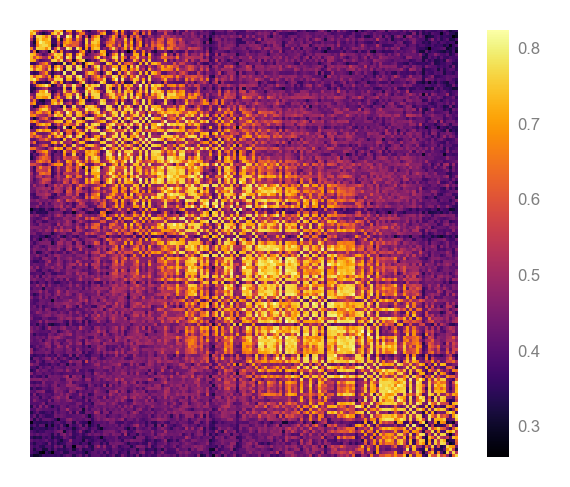

In [198]:
#params
tau_plus = 20e-3 #time scale at LTP decays 
tau_minus = 20e-3 #time scale at which LTD decays 
a_plus = 1
a_minus = 0.3
eta_plus = 0.01
eta_minus = 0.01
w_max = 1

#convert spikes to list 
spikeIDs = [[i]*len(spikeTimes[i]) for i in range(len(spikeTimes))]
spikeTimeList = np.concatenate(spikeTimes)
spikeIDList = np.concatenate(spikeIDs)
sortIDs = np.argsort(spikeTimeList)
spikeTimeList, spikeIDList = spikeTimeList[sortIDs], spikeIDList[sortIDs]

W = 0*np.ones((agent.nCells,agent.nCells))
for _ in range(1):
    #initialise arrays 
    lastSpikeTimes = -10 * np.ones(agent.nCells)
    preTrace = np.zeros(agent.nCells)
    postTrace = np.zeros(agent.nCells)
    templist = [] 
    lastTime = -10
    #iterate over spikes
    for i in tqdm(range(len(spikeTimeList))):
        templist.append(preTrace[4])
        time = spikeTimeList[i]
        spikeID = spikeIDList[i] 

        #update traces
        timeDiff = time - lastTime
        preTrace = preTrace * np.exp(- timeDiff / tau_plus)
        postTrace = postTrace * np.exp(- timeDiff / tau_minus)
        preTrace[spikeID] += a_plus
        postTrace[spikeID] += a_minus

        #update weights
        #pre updates 
        weightsToPost = W[:,spikeID]
        A_plus = (w_max - weightsToPost) * eta_plus
        weightsToPost += A_plus * preTrace
        #post updates 
        weightsFromPost = W[spikeID,:]
        A_minus = weightsToPost * eta_minus
        weightsFromPost += -A_minus * postTrace


        lastTime=time


plotter.plotM(M=W)

